In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import emoji

In [4]:
data = pd.read_csv('C:/Users/Kris/Desktop/Projects/Twitter Sentiment Analysis/finalSentimentdata2.csv',sep=',')
data.head()


,id,sentiment,text
0,3204,sad,agree the poor in india are treated badly thei...
1,1431,joy,if only i could have spent the with this cutie...
2,654,joy,will nature conservation remain a priority in ...
3,2530,sad,coronavirus disappearing in italy show this to...
4,2296,sad,uk records lowest daily virus death toll since...


In [10]:
data.

,id,sentiment,text
0,3204,sad,agree the poor in india are treated badly thei...
1,1431,joy,if only i could have spent the with this cutie...
2,654,joy,will nature conservation remain a priority in ...
3,2530,sad,coronavirus disappearing in italy show this to...
4,2296,sad,uk records lowest daily virus death toll since...


In [11]:
sentiment_map={'anger':-2,'fear':-1,'sad':1,'joy':2}
data.insert(2,'sentiment_int',[sentiment_map[s] for s in data.sentiment],True)
#data['sentiment_int']=[sentiment_map[s] for s in data.sentiment]
data.head()

,id,sentiment,sentiment_int,text
0,3204,sad,1,agree the poor in india are treated badly thei...
1,1431,joy,2,if only i could have spent the with this cutie...
2,654,joy,2,will nature conservation remain a priority in ...
3,2530,sad,1,coronavirus disappearing in italy show this to...
4,2296,sad,1,uk records lowest daily virus death toll since...


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3090 entries, 0 to 3089
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             3090 non-null   int64 
 1   sentiment      3090 non-null   object
 2   sentiment_int  3090 non-null   int64 
 3   text           3090 non-null   object
dtypes: int64(2), object(2)
memory usage: 96.7+ KB


In [13]:
data.sentiment_int.value_counts()

-1    801
 1    795
-2    767
 2    727
Name: sentiment_int, dtype: int64

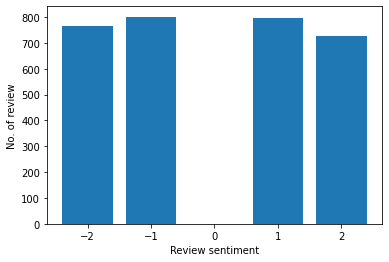

In [14]:
sentiment_count = data.groupby('sentiment_int').count()
plt.bar(sentiment_count.index.values,sentiment_count['text'])
plt.xlabel('Review sentiment')
plt.ylabel('No. of review')
plt.show()

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

def replaceEmoji(text):
    emoji_list=re.findall(emoji.get_emoji_regexp(),text)
    print(emoji_list)
    for i in emoji_list:
        text=re.sub(i,' '+emoji.demojize(i)[1:-1].replace('_',' ')+' ',text)
    return text

def preProcessor(text):
    import re
    from string import punctuation
    text=re.sub(r'(http|ftp|https):\/\/([\w\-_]+(?:(?:\.[\w\-_]+)+))([\w\-\.,@?^=%&:/~\+#]*[\w\-\@?^=%&/~\+#])?', ' ', text)
    text=re.sub(r'['+punctuation+']',' ',text)
    text=replaceEmoji(text)
    #print(token.tokenize(text))
    return text

token=RegexpTokenizer(r'\w+')
cv=CountVectorizer(lowercase=True,preprocessor=preProcessor,stop_words='english',ngram_range=(1,1),tokenizer=token.tokenize)
text_counts=cv.fit_transform(data['text'])


In [17]:
text_counts.getrow(0)


<1x10221 sparse matrix of type '<class 'numpy.int64'>'
	with 28 stored elements in Compressed Sparse Row format>

In [48]:
from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(text_counts,data['sentiment'],test_size=0.3)
x_train, x_test, y_train, y_test = train_test_split(text_counts,data['sentiment_int'],test_size=0.3)

In [50]:
from sklearn.naive_bayes import *
from sklearn import metrics

clf=MultinomialNB()
#clf=GaussianNB()
#clf=BernoulliNB()
clf.fit(x_train,y_train)
pred=clf.predict(x_test)
metrics.accuracy_score(y_test, pred)

0.6903991370010788

In [41]:
import emoji
# re.sub(r'['emoji.get_emoji_regexp()']',' ',text)
import re
# emoji.get_emoji_regexp()

def replaceEmoji(text):
    emoji_list=re.findall(emoji.get_emoji_regexp(),text)
    print(emoji_list)
    for i in emoji_list:
        text=re.sub(i,' 'emoji.demojize(i)[1:-1].replace('_',' ')+' ',text)
    return text
a='For example, the glyph 👨‍👨‍👧‍👧 consists of 7 unicode scalars:Four emoji characters: 👨👩👧👧In between each emoji is a special character, which works like charact'
replaceEmoji(a)

['👨\u200d👨\u200d👧\u200d👧', '👨', '👩', '👧', '👧']


'For example, the glyph  family man man girl girl  consists of 7 unicode scalars:Four emoji characters:  man  woman  girl  girl In between each emoji is a special character, which works like charact'

In [43]:
import emotlib
emotlib.demojify('*］')

'*］'